<a href="https://colab.research.google.com/github/Mamidalarajesh/predictive-maintainance-for-machine-failure-prediction-/blob/main/predictive_maintainance_for_machine_failure_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve


In [14]:
data = pd.read_csv('ai4i2020.csv')

In [15]:
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])
data = data.drop(['UDI', 'Product ID'], axis=1)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

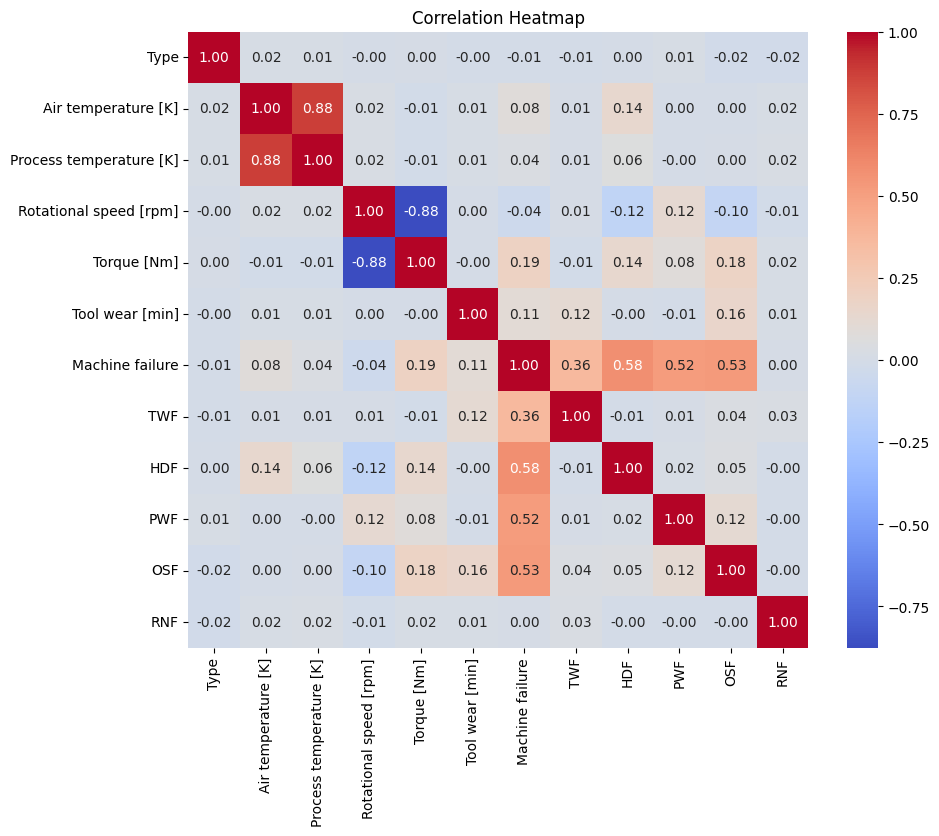

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
importances = rf_model.feature_importances_
features = X.columns
indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)

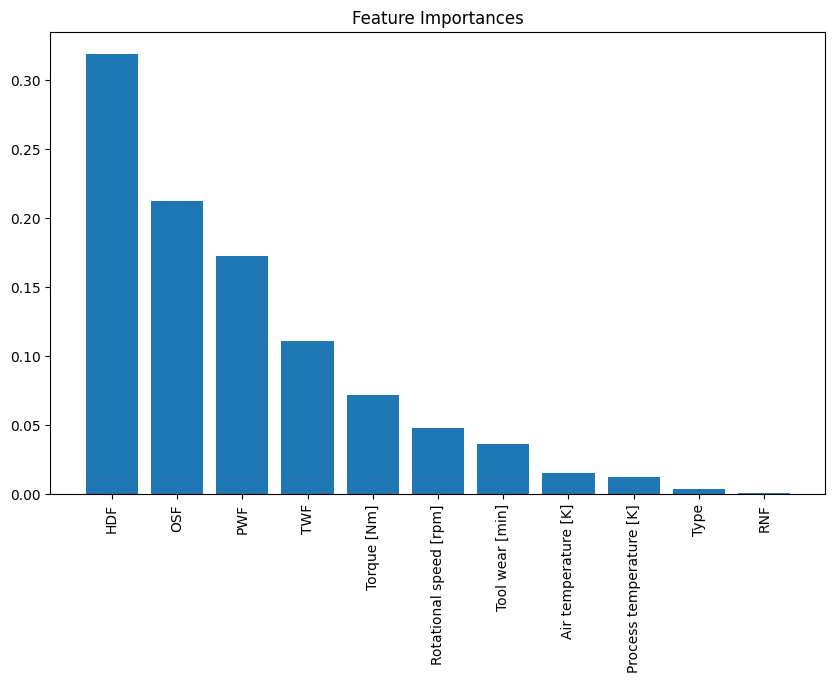

In [19]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), [importances[i] for i in indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.show()

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [22]:

X.columns = X.columns.str.replace(r'[\[\]<]', '', regex=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(**grid_search.best_params_, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Random Forest Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
 [[2907    0]
 [   3   90]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:02:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
 [[2907    0]
 [   3   90]]

Logistic Regression Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
 [[2907    0]
 [   3   90]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:

rf_best = models['Random Forest']


y_pred_rf = rf_best.predict(X_test)


print("Predictions for Machine Failure (Random Forest):")
print(y_pred_rf)


y_pred_proba_rf = rf_best.predict_proba(X_test)[:, 1]
print("Predicted probabilities for Machine Failure (Random Forest):")
print(y_pred_proba_rf)


Predictions for Machine Failure (Random Forest):
[0 0 0 ... 0 0 0]
Predicted probabilities for Machine Failure (Random Forest):
[0. 0. 0. ... 0. 0. 0.]


In [28]:
print("Class distribution in training data:")
print(y_train.value_counts())

print("Class distribution in test data:")
print(y_test.value_counts())


Class distribution in training data:
Machine failure
0    6754
1     246
Name: count, dtype: int64
Class distribution in test data:
Machine failure
0    2907
1      93
Name: count, dtype: int64


In [31]:

xgb_best = models['XGBoost']

y_pred_xgb = xgb_best.predict(X_test)

print("Predictions for Machine Failure (XGBoost):")
print(y_pred_xgb)

y_pred_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]

print("Predicted probabilities for Machine Failure (XGBoost):")
print(y_pred_proba_xgb)



Predictions for Machine Failure (XGBoost):
[0 0 0 ... 0 0 0]
Predicted probabilities for Machine Failure (XGBoost):
[6.8269575e-05 3.4402474e-04 9.9870940e-06 ... 1.2544991e-04 8.0219164e-05
 3.2969561e-05]


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

log_reg_best = models['Logistic Regression']

y_pred_lr = log_reg_best.predict(X_test_scaled)

print("Predictions for Machine Failure (Logistic Regression):")
print(y_pred_lr)

y_pred_proba_lr = log_reg_best.predict_proba(X_test_scaled)[:, 1]

print("Predicted probabilities for Machine Failure (Logistic Regression):")
print(y_pred_proba_lr)


Predictions for Machine Failure (Logistic Regression):
[0 0 0 ... 0 0 0]
Predicted probabilities for Machine Failure (Logistic Regression):
[0.07577687 0.11758748 0.13169191 ... 0.10257275 0.06329904 0.07642595]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
rf_best = models['Random Forest']
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

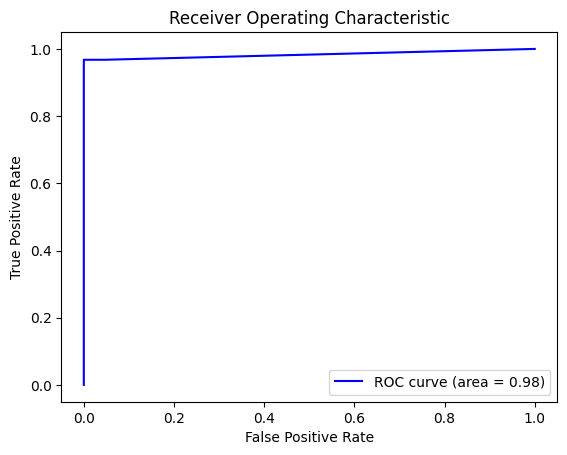

In [24]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

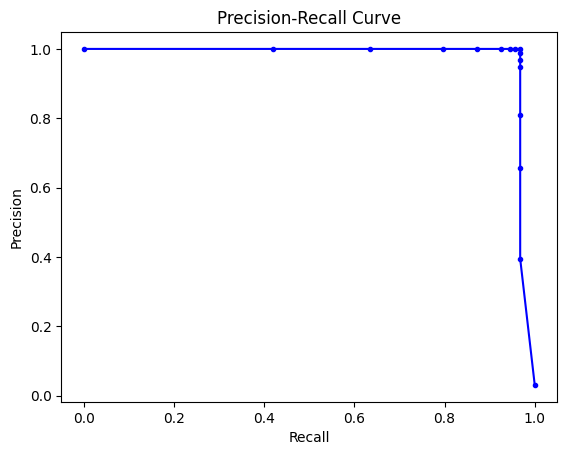

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [26]:
cv_scores = cross_val_score(rf_best, X, y, cv=10, scoring='accuracy')
print("\nCross-Validation Accuracy Scores for Random Forest:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores for Random Forest: [1.    0.999 0.999 0.999 1.    1.    0.999 0.997 1.    0.998]
Mean Cross-Validation Accuracy: 0.9991
